# Introduction:
    This is plant diease detection project and We have implemented deep learning model for that. This model could achive near about 99% accuracy trained over the 38 plant disease classes.
    
    So Lets have a look at code and its accuracy.

# Importing the important libraries

In [1]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import cv2
import glob
import os
from sklearn.model_selection import train_test_split
from PIL import Image
import re


# Loading the training data

In [2]:
data_folder = '/Users/rahulmisal/personal/Plant-disease-detection/data/raw/dataset/dataset'


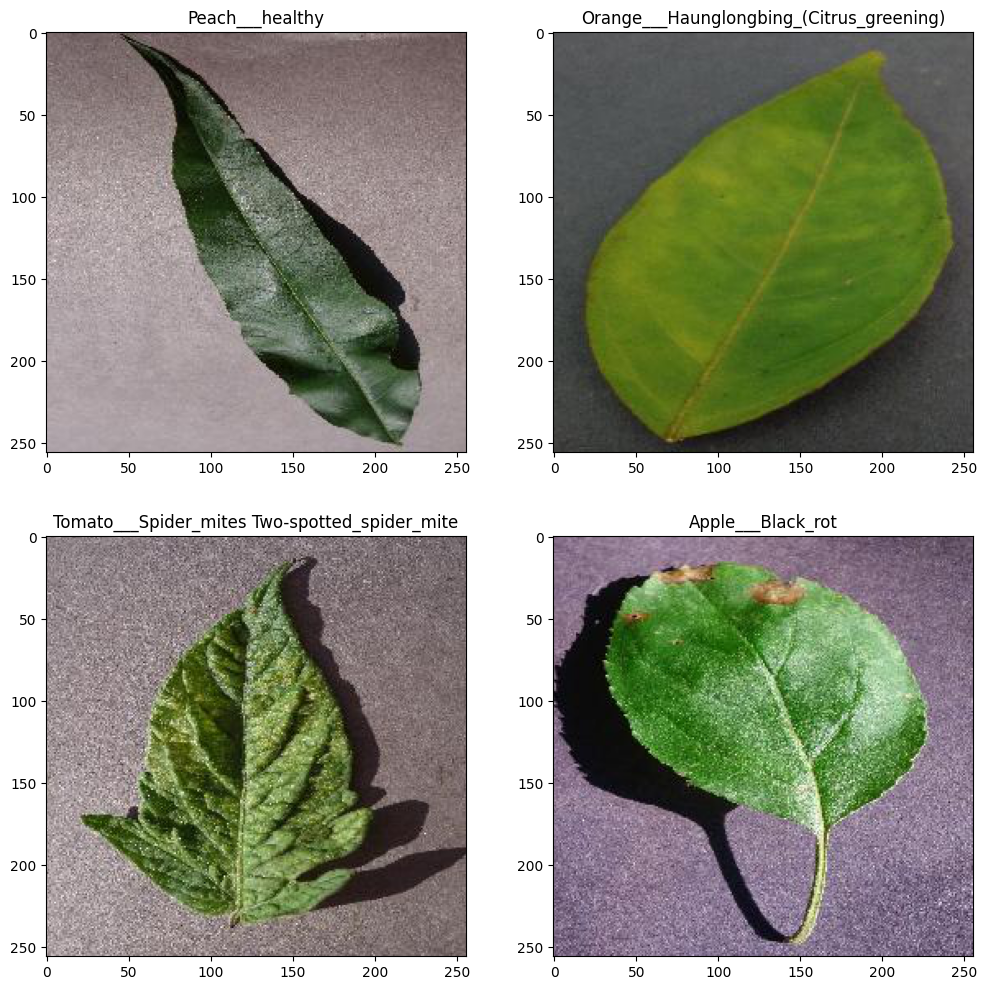

In [17]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
img = plt.imread(
    f'{data_folder}/train/Peach___healthy/f5820967-2eb3-41d7-98e4-3e05d7c4d391___Rutg._HL 3570.JPG')
axs[0, 0].imshow(img)
axs[0, 0].set_title('Peach___healthy')

img = plt.imread(
    f'{data_folder}/train/Orange___Haunglongbing_(Citrus_greening)/32484aac-d300-4e78-b1d6-181b9bf96551___UF.Citrus_HLB_Lab 1751.JPG')
axs[0, 1].imshow(img)
axs[0, 1].set_title('Orange___Haunglongbing_(Citrus_greening)')

img = plt.imread(
    f'{data_folder}/train/Tomato___Spider_mites Two-spotted_spider_mite/90b28f76-c548-4b20-8421-fc0a6687f755___Com.G_SpM_FL 1756.JPG')
axs[1, 0].imshow(img)
axs[1, 0].set_title('Tomato___Spider_mites Two-spotted_spider_mite')

img = plt.imread(
    f'{data_folder}/train/Apple___Black_rot/f24c943a-6339-48a5-bfb0-b866c926dc16___JR_FrgE.S 2931.JPG')
axs[1, 1].imshow(img)
axs[1, 1].set_title('Apple___Black_rot')

plt.show()


In [18]:
img.shape


(256, 256, 3)

In [36]:
re.split('/', glob.glob(f'{data_folder}/train/*/*JPG')[0])[10]


'Strawberry___healthy'

In [37]:
image_data = []
label_data = []
for i in glob.glob(f'{data_folder}/train/*/*JPG'):
    img = cv2.imread(i)
    image_to_array = Image.fromarray(img, "RGB")
    size_image = image_to_array.resize((128, 128))
    image_data.append(np.array(size_image))
    label_data.append(re.split('/', i)[10])


In [38]:
image_data = np.array(image_data)
label_data = pd.get_dummies(label_data)


In [39]:
image_data.shape


(42244, 128, 128, 3)

In [40]:
label_data.shape


(42244, 38)

In [41]:
label_data.head()


,Apple___Apple_scab,Apple___Black_rot,Apple___Cedar_apple_rust,Apple___healthy,Blueberry___healthy,Cherry_(including_sour)___Powdery_mildew,Cherry_(including_sour)___healthy,Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot,Corn_(maize)___Common_rust_,Corn_(maize)___Northern_Leaf_Blight,...,Tomato___Bacterial_spot,Tomato___Early_blight,Tomato___Late_blight,Tomato___Leaf_Mold,Tomato___Septoria_leaf_spot,Tomato___Spider_mites Two-spotted_spider_mite,Tomato___Target_Spot,Tomato___Tomato_Yellow_Leaf_Curl_Virus,Tomato___Tomato_mosaic_virus,Tomato___healthy
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Defining the neural network model

In [42]:
from keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, BatchNormalization, MaxPooling2D
from keras.models import Sequential
model = Sequential()
inputShape = (128, 128, 3)
chanDim = -1
model.add(Conv2D(32, (3, 3), padding="same", input_shape=inputShape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(38))
model.add(Activation("softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 activation (Activation)     (None, 128, 128, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 128, 128, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 42, 42, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 42, 42, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 42, 42, 64)        1

In [43]:
model.compile(optimizer='adam', loss='categorical_crossentropy',
              metrics=['accuracy'])


# Training on train dataset

In [44]:
model.fit(image_data, label_data, epochs=20)


Epoch 1/20
1321/1321 [==============================] - 803s 607ms/step - loss: 0.8987 - accuracy: 0.7435
Epoch 2/20
1321/1321 [==============================] - 1130s 856ms/step - loss: 0.4530 - accuracy: 0.8596
Epoch 3/20
1321/1321 [==============================] - 852s 645ms/step - loss: 0.2950 - accuracy: 0.9062
Epoch 4/20
 275/1321 [=====>........................] - ETA: 15:10 - loss: 0.2531 - accuracy: 0.9201

# Loading the test dataset

In [10]:
test_image_data = []
test_label_data = []
for i in glob.glob('/dataset/test/*/*JPG'):
    img = cv2.imread(i)
    image_to_array = Image.fromarray(img, "RGB")
    size_image = image_to_array.resize((128, 128))
    test_image_data.append(np.array(size_image))
    test_label_data.append(re.split('/', i)[7])


In [11]:
test_image_data = np.array(test_image_data)
test_label_data = pd.get_dummies(test_label_data)


# Checking with the model accuracy

In [12]:
model.evaluate(test_image_data, test_label_data)


10559/10559 [==============================] - 3s 314us/step


[0.1773367999749608, 0.9594658584641692]